In [3]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ['TF_ENABLE_ONEDNN_OPTS'] =  "0"

## Librerías
import numpy as np
import cv2 as cv2
import glob
from PIL import Image
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import keras
import os

## Uso de GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

print(tf.__version__)

2.14.0


<Figure size 640x480 with 0 Axes>

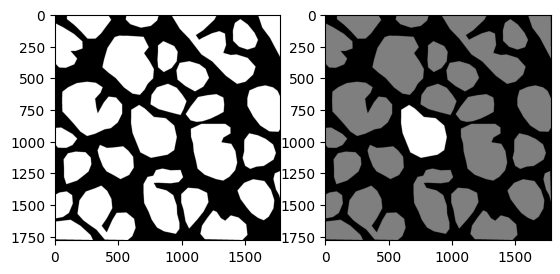

In [4]:
## Obtener todas las rutas de las imágenes en el dataset

rutas_example  = glob.glob('../../../Datasets/Micrografías segmentaciones/secas/MF1/1/mask/IMG_20230707_161353_jpg.jpg')[0]

img = keras.utils.load_img(rutas_example)
img_array = keras.utils.img_to_array(img)
new_array = (img_array>64).astype(np.int32)

new_img = keras.utils.array_to_img(new_array)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)
axarr[0].imshow(new_img)
axarr[1].imshow(img)

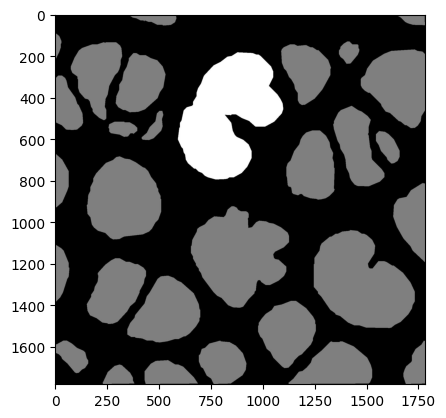

In [5]:
## Obtener todas las rutas de las imágenes en el dataset
rutas_dataset  = glob.glob('../../../Datasets/Micrografías segmentaciones/secas/*/*/*/*.jpg')

## Recorrer mascaras
#for ruta in rutas_dataset:
for ruta in rutas_dataset[0:int(len(rutas_dataset)/2)]:
    ruta_list = ruta.split('/')
    clase = ruta_list[6]
    number = ruta_list[7]
    tipo = ruta_list[8]
    name = ruta_list[9].split('.')[0]

    ## verificar que sea máscara
    if tipo == 'mask':
        img = keras.utils.load_img(ruta)
        plt.imshow(img)
        img_array = keras.utils.img_to_array(img)
        new_array = (img_array>64).astype(np.int32)


        new_img = keras.utils.array_to_img(new_array)
        ## save image
        folder = '../../../Datasets/Micrografías segmentaciones/secas/'+clase+'/'+number+'/mask_bin/'

        isExist = os.path.exists(folder)
        if not isExist:
            ## Crear carpeta si no existe
            os.makedirs(folder)
            ## Guardar imagen en la ruta
            new_route = folder+name+'.jpg'
            keras.utils.save_img(new_route,new_img,scale=False,)
        else:
            ## Guardar imagen en la ruta
            new_route = folder+name+'.jpg'
            keras.utils.save_img(new_route,new_img,scale=False,file_format=None)   

        img.close()
        new_img.close()

In [6]:
#for ruta in rutas_dataset:
for ruta in rutas_dataset[int(len(rutas_dataset)/2):]:
    ruta_list = ruta.split('/')
    clase = ruta_list[6]
    number = ruta_list[7]
    tipo = ruta_list[8]
    name = ruta_list[9].split('.')[0]

    ## verificar que sea máscara
    if tipo == 'mask':
        img = keras.utils.load_img(ruta)
        img_array = keras.utils.img_to_array(img)
        new_array = (img_array>64).astype(np.int32)


        new_img = keras.utils.array_to_img(new_array)
        ## save image
        folder = '../../../Datasets/Micrografías segmentaciones/secas/'+clase+'/'+number+'/mask_bin/'

        isExist = os.path.exists(folder)
        if not isExist:
            ## Crear carpeta si no existe
            os.makedirs(folder)
            ## Guardar imagen en la ruta
            new_route = folder+name+'.jpg'
            keras.utils.save_img(new_route,new_img,scale=False,)
        else:
            ## Guardar imagen en la ruta
            new_route = folder+name+'.jpg'
            keras.utils.save_img(new_route,new_img,scale=False,file_format=None)   

        img.close()
        new_img.close()